## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data manipulation/Exploratory Data Analysis
2.	Multipe regression Analysis
3.  Variable selection

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Converting into a pdf gave problems to some of you, you should send in both a ipynb and an html file of your work. 

Good luck!


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 1. Data 

## 1.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [4]:
##your code here
print(df.dtypes)
#bore, stroke, horse_power, peak_rpm, are objects even though they can be represented through numbers

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [5]:
## Your code here
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].apply(pd.to_numeric, errors='coerce')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [7]:
## Your code here
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)

In [8]:
df2.head()


,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [9]:
## your code goes here
df2 = df2.dropna()

In [10]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [11]:
## Your code goes here
df2['fuel_type'] = pd.get_dummies(df2['fuel_type'], drop_first=True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    uint8  
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


## 1.2 EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to **explain** what you are doing


In [13]:
## Your EDA should start here
#1. Provide descriptions of your sample and features
#Find row and columns
print("Rows/Observations: " + str(df2.shape[0]))
print("Columns/Features: " + str(df2.shape[1]))
print(df2.info())
#Check how many variables are categorical, rest are likely numeric
categorical_variables = 0
for i in df2.dtypes:
 if i == object:
     categorical_variables += 1
print("The data frame has " + str(categorical_variables) + " features that is/are categorical")
#print quick description
df2.describe()

Rows/Observations: 195
Columns/Features: 15
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    uint8  
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB
None
The data frame has 0 features that is/are categorical


,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.897436,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,0.304170,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,1.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
#2 Check for missing values
missing_values = False
for i in df2.isnull().sum():
    if i != 0:
         missing_values = True
if(not missing_values):
     print("There are no missing values")
else:
    print("There are missing values")
print(df2.isnull().sum())
print("\n\n")
print(df2.value_counts("fuel_type"))
print("We can see our data is not balanced because there a large ratio of gas to diesel cars")

There are no missing values
fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64



fuel_type
1    175
0     20
dtype: int64
We can see our data is not balanced because there a large ratio of gas to diesel cars


From the countplot, we can see our data consists mostly of gas reliant cars than diesel


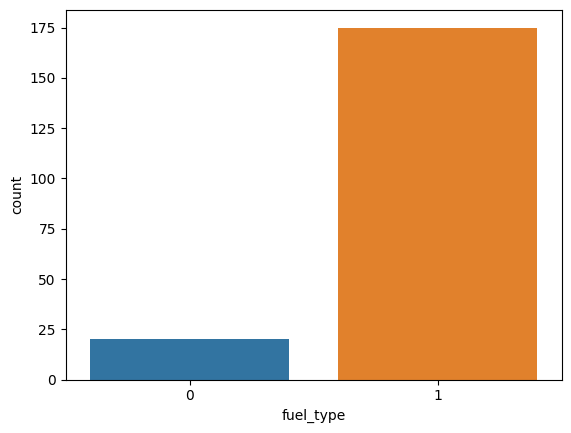

In [15]:
#3 Find shape of data
sns.countplot(x='fuel_type', data=df2)
print("From the countplot, we can see our data consists mostly of gas reliant cars than diesel")

<Axes: xlabel='length', ylabel='width'>

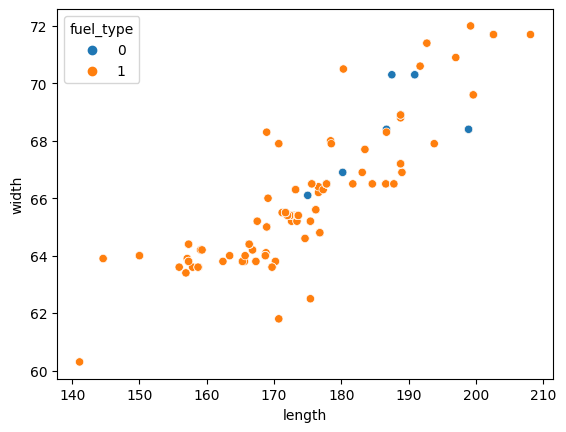

In [16]:
sns.scatterplot(data=df2, x="length", y="width", hue='fuel_type')


In [17]:
#Above, we see the length and width of the car doesn't appear to be affected
#by the fuel type, although this can be because we have few diesel data points

<Axes: xlabel='engine_size', ylabel='city_mpg'>

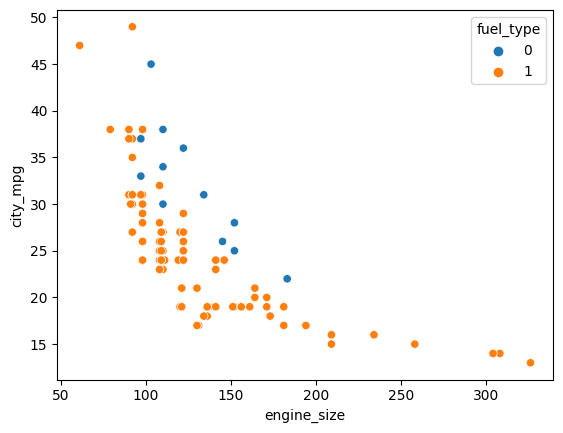

In [18]:
sns.scatterplot(data=df2, x="engine_size", y="city_mpg", hue='fuel_type')

In [19]:
#Once again, the fuel type doesnt appear to affect the city mpg or engine_size. 
#However we can see as the engine size increases, mpg decreases so there may 
#be a negative correlation

<Axes: xlabel='fuel_type', ylabel='engine_size'>

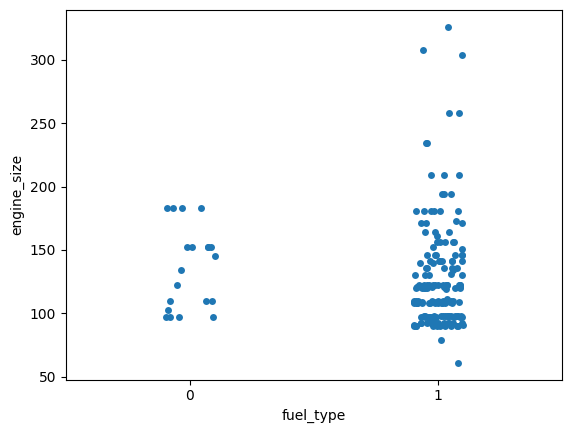

In [20]:
sns.stripplot(y ='engine_size', x = 'fuel_type', data = df2)

In [21]:
#This plot appears to support our previous statement that fuel_type
#doesnt affect engine size. While there are some outliers for gas,
#It could be due to our low sample size for diesel
#However, we should rememeber that gas cars can reach up to 300+ units for 
#engine size

<Axes: xlabel='fuel_type', ylabel='price'>

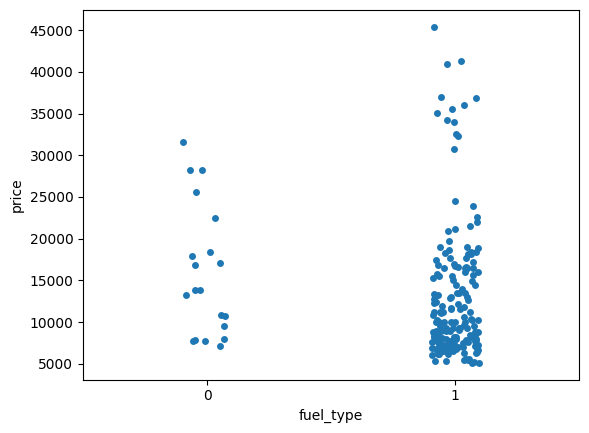

In [22]:
sns.stripplot(y ='price', x = 'fuel_type', data = df2)

In [23]:
#Here we can see the price of both fuel types can vary heavily

<Axes: xlabel='length', ylabel='Count'>

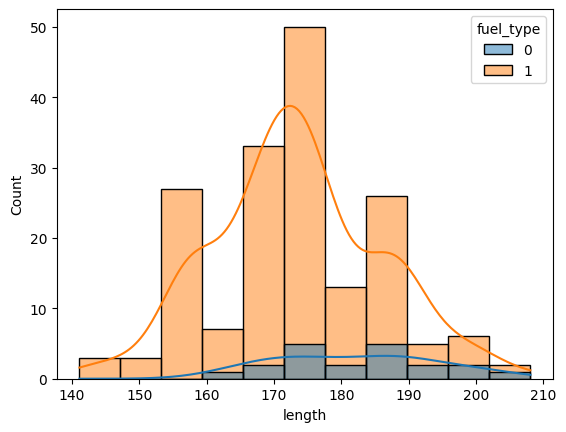

In [24]:
sns.histplot(x='length', data=df2, hue='fuel_type', kde=True)

<Axes: xlabel='engine_size', ylabel='Count'>

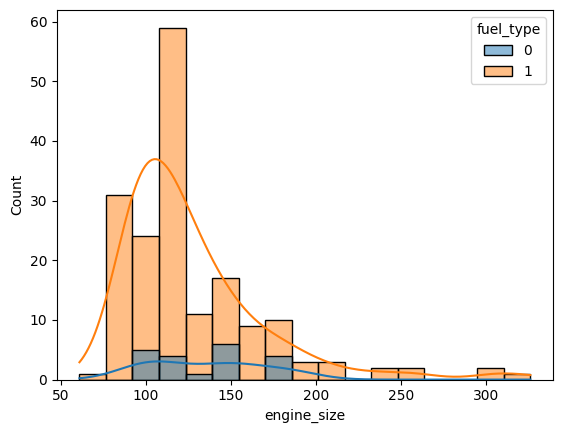

In [25]:
sns.histplot(x='engine_size', data=df2, hue='fuel_type', kde=True)

<Axes: xlabel='price', ylabel='Count'>

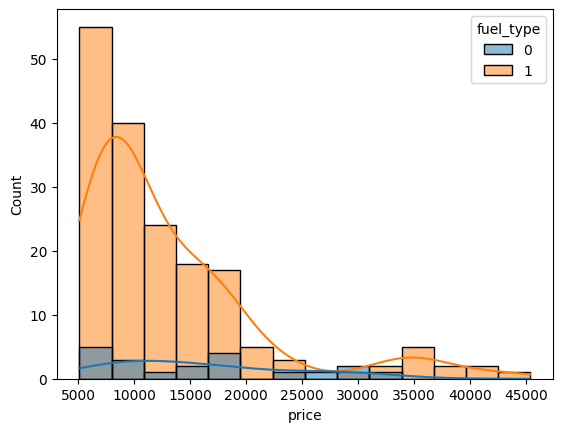

In [26]:
sns.histplot(x='price', data=df2, hue='fuel_type', kde=True)

In [27]:
#From the plots above, we can find a lot of specifics about the fuel types
#For example, the gas cars have lengths mainly between 170-180
#Same for the diesel as well

#Gas cars mainly have an engine size between 100-125 units
#While diesel cars tend to have a size between 140-155 units

#For price, we can see for gas the graph is heavily left skewed,
#meaning most gas cars are on the cheaper spectrum. However, we can also
#see that are a few expensive cars as well.
#Diesel seems to be skewed all over the place, meaning it's price varies
#greatly.

In [28]:
#4 Identify Significant Correlation
df2.corr(method="pearson")

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
fuel_type,1.000000,-0.303643,-0.210618,-0.245375,-0.279070,-0.219488,-0.063490,-0.056245,-0.253774,-0.985398,0.168454,0.480952,-0.260796,-0.193998,-0.108968
wheel_base,-0.303643,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,-0.210618,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,-0.245375,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
heights,-0.279070,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb_weight,-0.219488,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine_size,-0.063490,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,-0.056245,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,-0.253774,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
comprassion,-0.985398,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500


In [29]:
#There appears to be significant correlation between 
#length/width and wheel_base
#length/width and curb_weight
#engine_size and horse_power
#engine_size and price
#and some correlation between 
#horse_power and price
#curb_weight and price

<Axes: xlabel='fuel_type', ylabel='engine_size'>

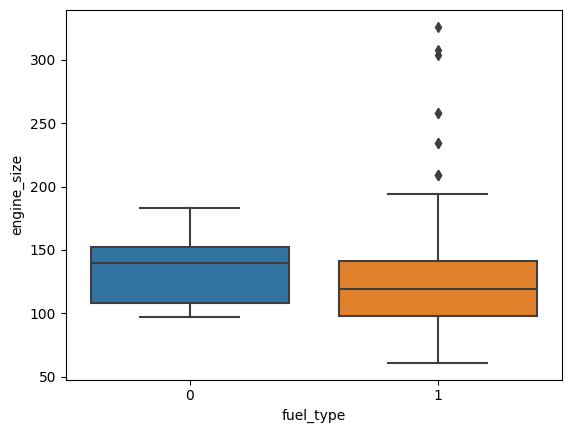

In [30]:
#5 Detect and Handle Outliers
sns.boxplot(x="fuel_type", y="engine_size", data=df2)

<Axes: xlabel='fuel_type', ylabel='length'>

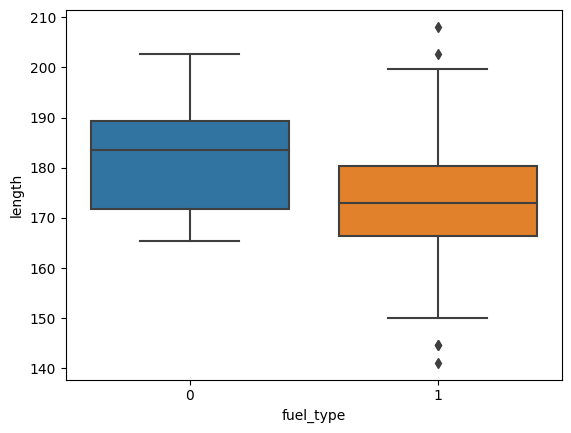

In [31]:
sns.boxplot(x="fuel_type", y="length", data=df2)

<Axes: xlabel='fuel_type', ylabel='wheel_base'>

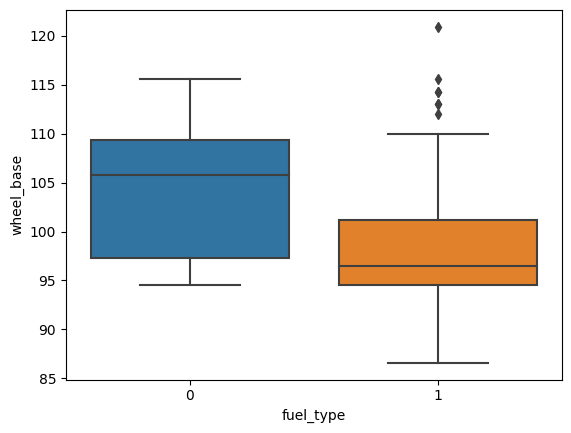

In [32]:
sns.boxplot(x="fuel_type", y="wheel_base", data=df2)

In [33]:
#looking at the box plots between the fuel_types,we can see diesel has
#no outliers while gas appears to have many

#This could be due to the fact that we have a larger sample size of gas cars,
#and the outliers are simply just luxurious cars that dont fit into the
#population

<Axes: ylabel='length'>

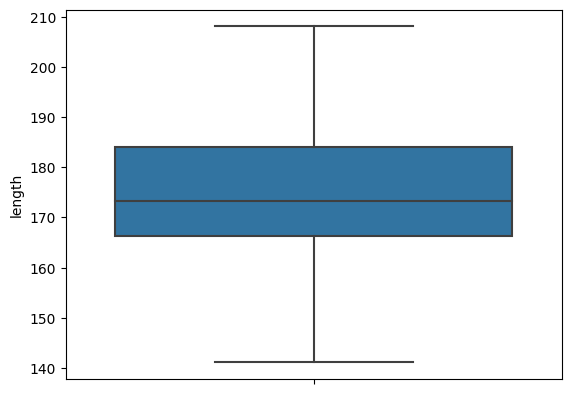

In [34]:
sns.boxplot(y="length", data=df2)

<Axes: ylabel='engine_size'>

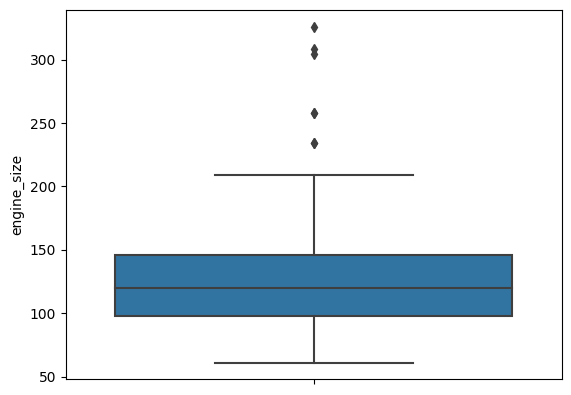

In [35]:
sns.boxplot(y="engine_size", data=df2)

<Axes: ylabel='wheel_base'>

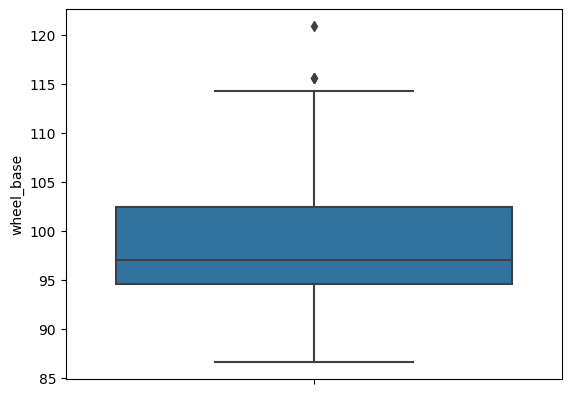

In [36]:
sns.boxplot(y="wheel_base", data=df2)

<Axes: ylabel='horse_power'>

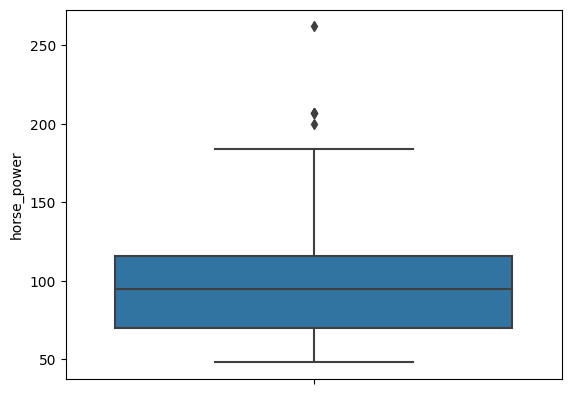

In [37]:
sns.boxplot(y="horse_power", data=df2)

In [38]:
#Besides the length of every car regardless of fuel_type,
#we can see there are many outliers in the graphs. 
#This can be due to our previous statement, where there are luxurious 
#cars being outliers in our data set


In [39]:
#Find quartiles of data
Q1 = df2['wheel_base'].quantile(0.25)
Q3 = df2['wheel_base'].quantile(0.75)
print("Q1 = " + str(Q1))
print("Q3 = " + str(Q3))
IQR = Q3-Q1
print("IQR = " + str(IQR))
u_fence = Q3 + (1.5 * IQR)
print("Upper fence = " + str(u_fence))

Q1 = 94.5
Q3 = 102.4
IQR = 7.900000000000006
Upper fence = 114.25000000000001


<Axes: ylabel='wheel_base'>

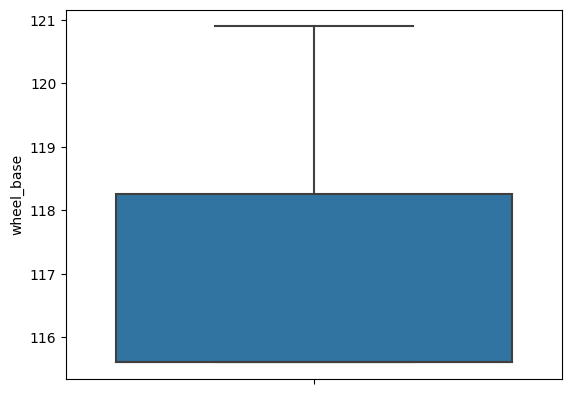

In [40]:
#Find outliers above upper fence
df2_wb_filtered = df2[df2['wheel_base'] >= u_fence]
sns.boxplot(y="wheel_base", data=df2_wb_filtered)

## 2. Multiple Regression Analysis

**1. Create a model that uses all the variables** and call it **model1**. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [131]:
##Your code goes here
x = df2.drop('price', axis=1)
y = df2['price']
model1 = ols(formula='price ~ fuel_type+wheel_base+length+width+heights+curb_weight+engine_size+bore+stroke+comprassion+horse_power+peak_rpm+city_mpg+highway_mpg', data=df2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.84e-69
Time:                        13:26:49   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.45e+04   1.84e+04     -2.419      

In [105]:
#t-test with 90% confidence
cis = []
print("Confidence intervals:")
print(model1.conf_int( .10, None))


Confidence intervals:
                        0             1
Intercept   -74919.484963 -14079.503672
fuel_type   -21656.934603  -1809.077930
wheel_base    -131.674276    210.735300
length        -157.355464     36.088900
width          182.795801   1024.486918
heights         96.530236    562.603582
curb_weight     -1.693057      4.052748
engine_size    111.815672    165.091659
bore         -3203.499374    786.672056
stroke       -5151.940648  -2260.165516
comprassion  -1355.297323    120.997885
horse_power      4.791122     64.474527
peak_rpm         1.379439      3.723907
city_mpg      -587.200631     10.627092
highway_mpg     46.242008    587.024849


In [117]:
SSE = model1.bse[1:15].sum()
variance = SSE/(len(x['fuel_type'] - (len(x.columns)+1)))
print(variance)

48.55585457279444


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

#### Your answers to the questions above go here

1. When all explanatory variables are at 0, then the price will be at really low

2. Significant variables that have a p-value < 5% are width, heights, engine_size, stroke, and peak_rpm. (5)

3.Var = 48.56

4.R-squared = .860, which is the percent explained by the independent variable

5. F-statistic is used to test if a set of variables are significant in a data set. 


**2. Dropp all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it **model2**. Print a summary of the results and answer the questions bellow. 

In [132]:
## your code goes here
dfSS = df2.drop(['fuel_type','wheel_base','length','curb_weight','bore','comprassion','horse_power','city_mpg','highway_mpg'], axis=1)
model2 = ols(formula='price ~ width + heights + engine_size + stroke + peak_rpm', data=dfSS).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           6.10e-73
Time:                        13:26:58   Log-Likelihood:                -1852.0
No. Observations:                 195   AIC:                             3716.
Df Residuals:                     189   BIC:                             3736.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.285e+04   1.13e+04     -6.462      

In [147]:
SSE = model2.bse[1:6].sum()
variance = SSE/(len(x['width'] - (len(x.columns)+1)))
print("Variance: " + str(variance))

Variance: 5.5162877594675095


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

#### Your answers to the questions above go here

1. When all explanatory variables are at 0, then the price will be low?

2. Every variable is significant, with a p-value < .05

3.Var = 5.52

4.R-squared = 0.839, which is the percent explained by the independent variable
Adjusted R-Squared= 0.835, while model1 is 0.849.

5. F-statistic is used to test if a set of variables are significant in a data set.


**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [146]:
##your code goes here
print("Anova Model1")
print(anova_lm(model1,typ=2))

print("\nAnova Model2")
print(anova_lm(model2,typ=2))


Anova Model1
                   sum_sq     df          F        PR(>F)
fuel_type    3.745641e+07    1.0   3.821095  5.215992e-02
wheel_base   1.428591e+06    1.0   0.145737  7.030934e-01
length       1.053040e+07    1.0   1.074253  3.013772e-01
width        5.512991e+07    1.0   5.624047  1.877178e-02
heights      5.359367e+07    1.0   5.467328  2.047381e-02
curb_weight  4.519427e+06    1.0   0.461047  4.980073e-01
engine_size  7.239036e+08    1.0  73.848610  3.971695e-15
bore         9.830666e+06    1.0   1.002870  3.179614e-01
stroke       1.760472e+08    1.0  17.959352  3.599345e-05
comprassion  1.873137e+07    1.0   1.910870  1.685795e-01
horse_power  3.609138e+07    1.0   3.681841  5.659025e-02
peak_rpm     1.269686e+08    1.0  12.952631  4.128052e-04
city_mpg     2.492483e+07    1.0   2.542692  1.125601e-01
highway_mpg  3.674536e+07    1.0   3.748557  5.441949e-02
Residual     1.764456e+09  180.0        NaN           NaN

Anova Model2
                   sum_sq     df           F 

**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

#### Your answers to the questions above go here


.

**5. Is there Multicollinearity in your data?**

In [139]:
##your code goes here

#### Your answers to the questions above go here

# 3. Variable selection

In our class we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Continue using the dataset 'auto_imports1.csv' from the previous sections. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables. Make sure that you import the needed libraries (you can find examples on canvas)

### 3.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

In [141]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
select = SelectKBest(chi2, k=2)
z = select.fit_transform(X,y)
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', z.shape[1])


Original number of features: 14
Reduced number of features: 2


In [142]:
filter = select.get_support()
features = array(df2.drop(['fuel_type'], axis = 1).columns)

print("All features:")
print(features)
 
print("Selected best 2:")
print(features[filter])

All features:
['wheel_base' 'length' 'width' 'heights' 'curb_weight' 'engine_size'
 'bore' 'stroke' 'comprassion' 'horse_power' 'peak_rpm' 'city_mpg'
 'highway_mpg' 'price']
Selected best 2:
['engine_size' 'city_mpg']


In [143]:
#Now we know after doing chi-squared test between each feature and price, engine_size and city_mpg are best selected

### 3.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In [144]:
#Foward Selection to find 2 best features
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X,y)

print("Features selected: " + str(sfs.k_feature_names_))

Features selected: ('width', 'engine_size')


In [145]:
#Doing foward selection on our data, we select width and engine_size when tested with price

### 3.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

In [146]:
x_train, x_test, y_train, y_test = train_test_split(
    df2.iloc[:, :-1], df2.iloc[:, -1],
    test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))



Train data shape of X = (146, 14) and Y = (146,) : 
Test data shape of X = (49, 14) and Y = (49,) : 


In [147]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  5464694.311514594
        Columns  Coefficient Estimate
0     fuel_type         -14295.696980
1    wheel_base             58.336253
2        length            -31.295811
3         width            711.996316
4       heights            342.806669
5   curb_weight              0.103799
6   engine_size            137.750570
7          bore          -2090.391162
8        stroke          -4587.520946
9   comprassion           -843.282281
10  horse_power             47.169155
11     peak_rpm              2.700314
12     city_mpg           -146.054152
13  highway_mpg            231.629835


In [ ]:
#From the output above we can see there are some features that play little to no 
#significance in our data
#Such as curb_weight and peak_rpm

In [156]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mse_ridge = np.mean((y_pred - y_test)**2)
print("mean square error: " + str(mse_ridge))

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean square error: 5043135.755419434
        Columns  Coefficient Estimate
0     fuel_type          -2344.716155
1    wheel_base             85.306758
2        length            -77.340038
3         width            765.268824
4       heights            369.815016
5   curb_weight              0.510037
6   engine_size            126.604304
7          bore          -1191.180478
8        stroke          -3273.957375
9   comprassion             34.429794
10  horse_power             50.255406
11     peak_rpm              2.330824
12     city_mpg           -154.868507
13  highway_mpg            182.594460


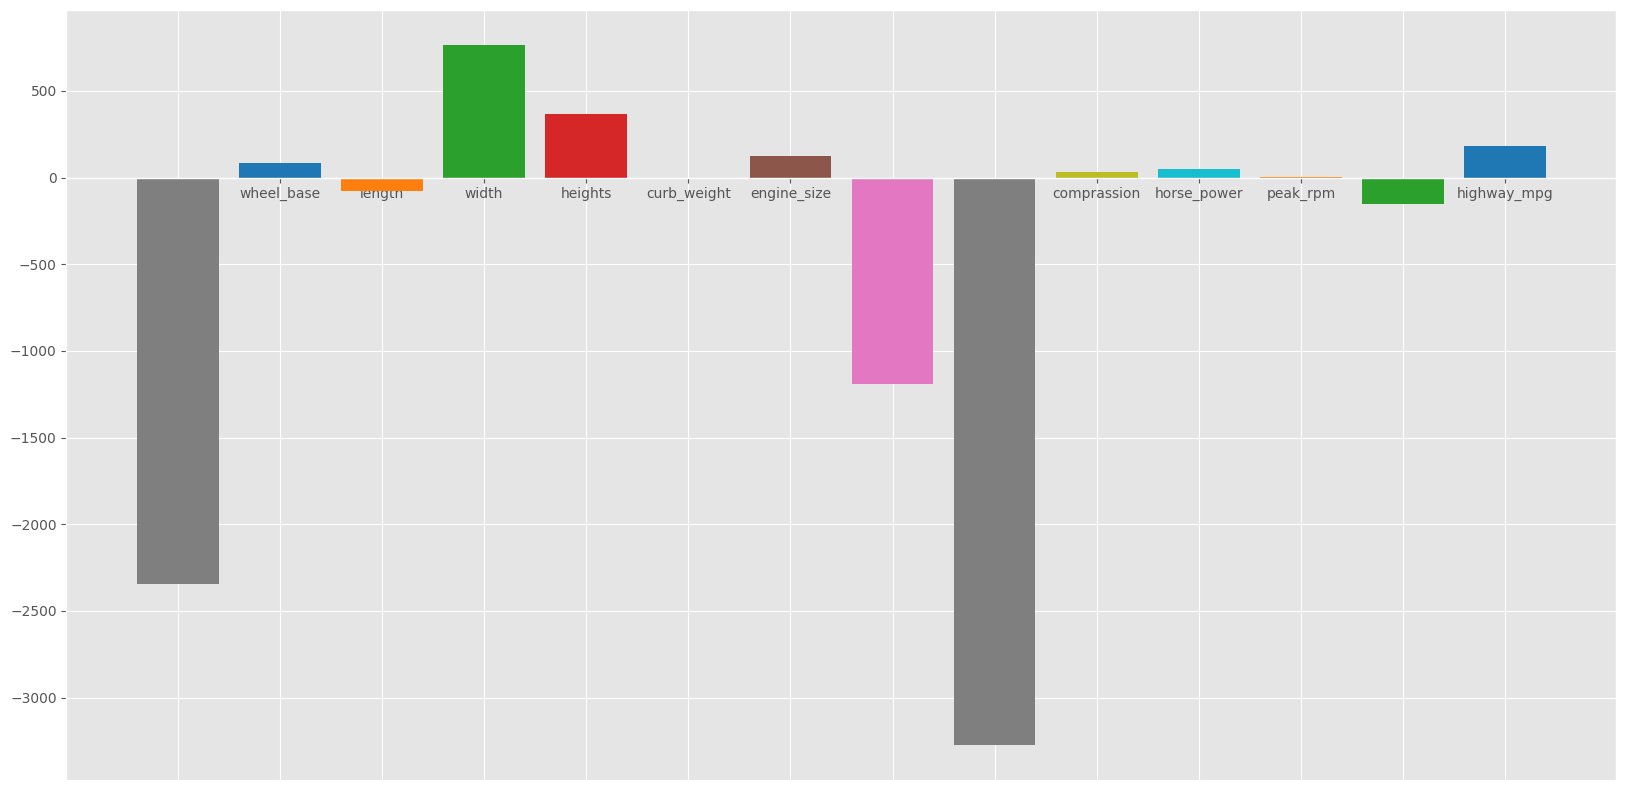

In [157]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### 3.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

In [ ]:
#Each method seemed to get us difference answers, probably
#due to the different algorithms each method uses
#Comparing the model1 coefficents to the Ridge Regression coefficients,
#The values for both are close, although they may be scaled differently
#they then to be in the same direction

### 3.5 Bonus question (*extra 5 points*)
Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.